In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Rescaling
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [2]:
train_dir = r'C:\Users\202016202.UFH-STUDENT\OneDrive - University of Fort Hare\Documents\Python Scripts\Research Project\Diagnosis of Diabetic Retinopathy\train'
test_dir = r'C:\Users\202016202.UFH-STUDENT\OneDrive - University of Fort Hare\Documents\Python Scripts\Research Project\Diagnosis of Diabetic Retinopathy\test'
validation_dir = r'C:\Users\202016202.UFH-STUDENT\OneDrive - University of Fort Hare\Documents\Python Scripts\Research Project\Diagnosis of Diabetic Retinopathy\valid'

In [3]:
#Classes on the dataset
tot_classes = os.listdir(r'C:\Users\202016202.UFH-STUDENT\OneDrive - University of Fort Hare\Documents\Python Scripts\Research Project\Diagnosis of Diabetic Retinopathy\train')
tot_classes

['DR', 'No_DR']

In [4]:
# Set parameters
batch_size = 32
img_height = 150
img_width = 150

In [5]:
# Data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [6]:
# For validation and test sets, we only rescale without augmentation
test_datagen = ImageDataGenerator(rescale=1.0/255)
valid_datagen = ImageDataGenerator(rescale=1.0/255)

# Load the training dataset
train_datas = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

# Load the validation dataset
valid_datas = valid_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

# Load the test dataset
test_datas = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

Found 2076 images belonging to 2 classes.
Found 531 images belonging to 2 classes.
Found 231 images belonging to 2 classes.


In [7]:
# Modified code to print class names (from class indices)
class_names = list(train_datas.class_indices.keys())
print(class_names)


['DR', 'No_DR']


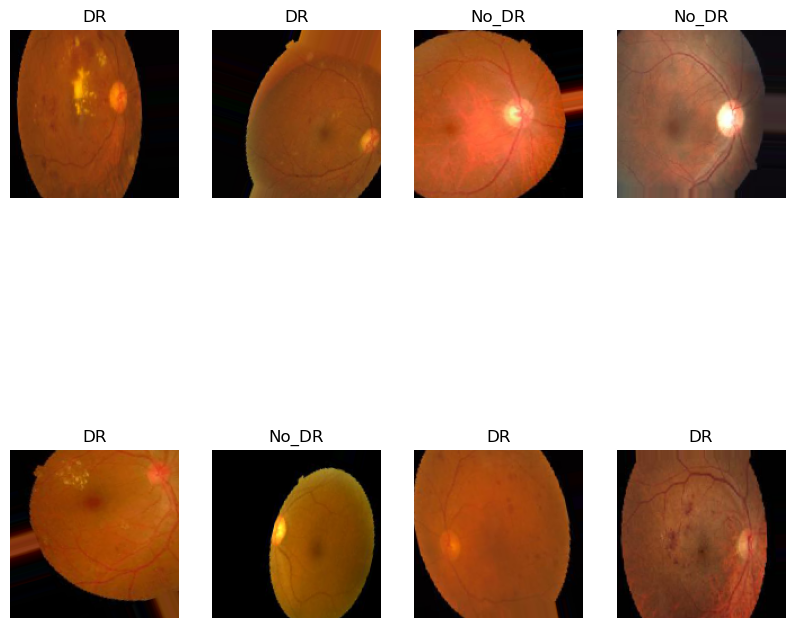

In [8]:
# Displaying one batch of images
plt.figure(figsize=(10, 10))
for images, labels in train_datas:
    for i in range(8):
        ax = plt.subplot(2, 4, i+1)
        plt.imshow(images[i])
        plt.title(class_names[int(labels[i])])
        plt.axis("off")
    break


In [9]:
# Print image and label shapes
for image_batch, labels_batch in train_datas:
    print(image_batch.shape)
    print(labels_batch.shape)
    break


(32, 150, 150, 3)
(32,)


In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Clear previous sessions
tf.keras.backend.clear_session()

num_classes = len(class_names)

# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(1, activation='sigmoid')
])

# Compile the model with optimizer tuning
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall', 'AUC'])


model.summary()

C:\Users\202016202.UFH-STUDENT\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,829,889 (18.42 MB)

 Trainable params: 4,829,185 (18.42 MB)

 Non-trainable params: 704 (2.75 KB)

In [11]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

# Train the model
history = model.fit(
    train_datas,
    epochs=50,
    validation_data=valid_datas,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/50


C:\Users\202016202.UFH-STUDENT\AppData\Local\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


65/65 ━━━━━━━━━━━━━━━━━━━━ 125s 1s/step - AUC: 0.7829 - Precision: 0.7404 - Recall: 0.7353 - accuracy: 0.7344 - loss: 0.6723 - val_AUC: 0.6364 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.4614 - val_loss: 2.7085 - learning_rate: 0.0010
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - AUC: 0.8829 - Precision: 0.8127 - Recall: 0.8173 - accuracy: 0.8144 - loss: 0.4703 - val_AUC: 0.5564 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.4614 - val_loss: 2.9029 - learning_rate: 0.0010
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - AUC: 0.9327 - Precision: 0.8699 - Recall: 0.8563 - accuracy: 0.8681 - loss: 0.3493 - val_AUC: 0.6092 - val_Precision: 0.8571 - val_Recall: 0.0210 - val_accuracy: 0.4708 - val_loss: 1.8862 - learning_rate: 0.0010
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - AUC: 0.9366 - Precision: 0.8673 - Recall: 0.8881 - accuracy: 0.8815 - loss: 0.3515 - val_AUC: 0.8040 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e

In [37]:
# Evaluate the model on the test set
test_loss, test_acc, test_precision, test_recall, test_auc = model.evaluate(test_datas)
print(f"Test Accuracy: {test_acc}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test AUC: {test_auc}")


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 250ms/step - AUC: 0.9631 - Precision: 0.9177 - Recall: 0.9889 - accuracy: 0.9498 - loss: 0.2090
Test Accuracy: 0.9523809552192688
Test Precision: 0.9279999732971191
Test Recall: 0.9830508232116699
Test AUC: 0.9631767868995667


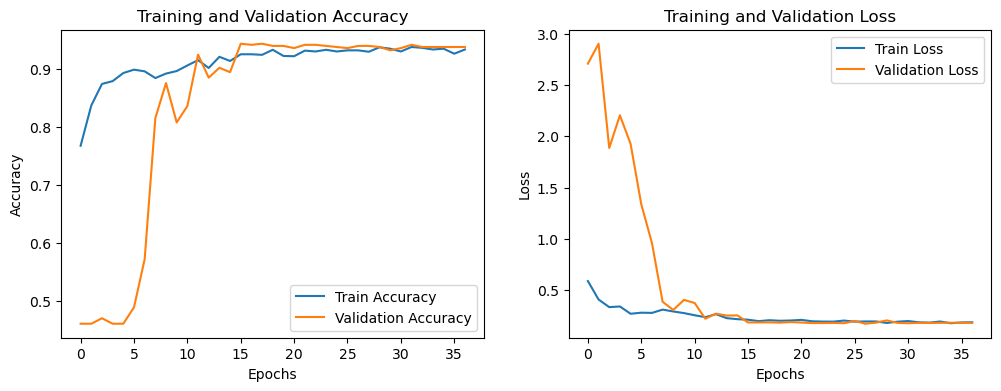

In [13]:
# Plotting training & validation accuracy and loss
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [33]:
# Save the model in the native Keras format
model.save('diabetic_retinopathy_model.keras')


Processing: C:\Users\202016202.UFH-STUDENT\OneDrive - University of Fort Hare\Documents\Python Scripts\Research Project\Diagnosis of Diabetic Retinopathy\test\DR\00cb6555d108_png.rf.29cca170969c6e9918ef9b9209abef8e.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


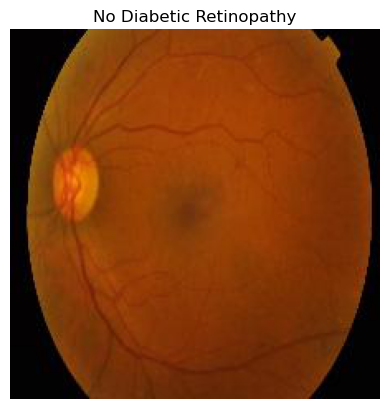

Processing: C:\Users\202016202.UFH-STUDENT\OneDrive - University of Fort Hare\Documents\Python Scripts\Research Project\Diagnosis of Diabetic Retinopathy\test\DR\0104b032c141_png.rf.2b861f09f8526f5316cd44d8522bf62e.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


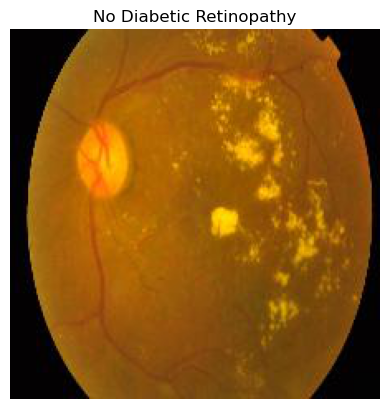

Processing: C:\Users\202016202.UFH-STUDENT\OneDrive - University of Fort Hare\Documents\Python Scripts\Research Project\Diagnosis of Diabetic Retinopathy\test\DR\03747397839f_png.rf.b634cf9fb09372b2c9c6bc6616bd5d7c.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


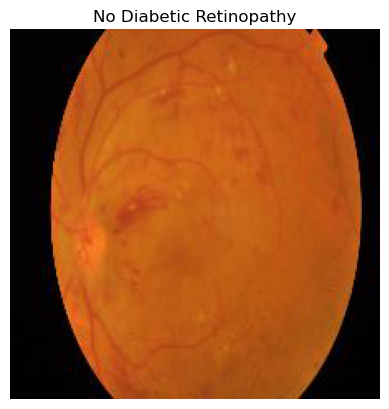

Processing: C:\Users\202016202.UFH-STUDENT\OneDrive - University of Fort Hare\Documents\Python Scripts\Research Project\Diagnosis of Diabetic Retinopathy\test\DR\04d029cfb612_png.rf.d9cf2e2a4e995a99b83e2595d66db6d2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


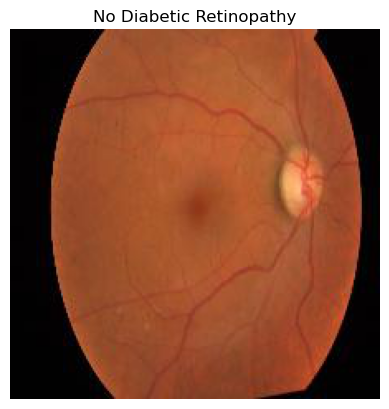

Processing: C:\Users\202016202.UFH-STUDENT\OneDrive - University of Fort Hare\Documents\Python Scripts\Research Project\Diagnosis of Diabetic Retinopathy\test\DR\0ada12c0e78f_png.rf.3e8e491a2cacb9af201e2f89f3afca61.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


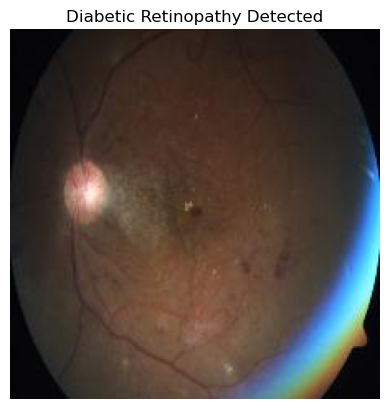

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import os

# Load the trained model
model_path = 'diabetic_retinopathy_model.keras'
loaded_model = load_model(model_path)

# Function to preprocess the image for prediction
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) 
    img_array /= 255.0  # Normalize pixel values
    return img_array

# Function to detect retinopathy for a single image
def detect_retinopathy(img_path):
    
    # Preprocess the image
    img_array = preprocess_image(img_path)

    # Use the model to predict
    prediction = loaded_model.predict(img_array)
    
    # Classification based on threshold
    if prediction > 0.5:
        result = "Diabetic Retinopathy Detected"
    else:
        result = "No Diabetic Retinopathy"

    # Display the image and result
    plt.imshow(image.load_img(img_path))
    plt.title(result)
    plt.axis("off")
    plt.show()

# Function to recursively fetch image files from the directory (including subdirectories)
def get_image_files_from_subdirs(root_dir):
    
    # Recursively get all image files from subdirectories
    image_files = []
    for root, dirs, files in os.walk(root_dir):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_files.append(os.path.join(root, file))
    return image_files

# Function to automate predictions for a batch of images
def diagnose_batch(test_images_path, num_images=5):
    
    # Get images from subdirectories (handles images inside folders like 'DR', 'No_DR')
    image_files = get_image_files_from_subdirs(test_images_path)

    if len(image_files) == 0:
        print("No images found in the directory or subdirectories!")
        return

    # Process only the first num_images images
    for img_file in image_files[:num_images]:
        print(f"Processing: {img_file}")
        detect_retinopathy(img_file)

# Define the test dataset path
test_images_path = r'C:\Users\202016202.UFH-STUDENT\OneDrive - University of Fort Hare\Documents\Python Scripts\Research Project\Diagnosis of Diabetic Retinopathy\test'

# Run diagnosis on a batch of images (e.g., first 5 test images)
diagnose_batch(test_images_path, num_images=5)


In [41]:
pip install shap


   ---------------------------------------- 0.0/456.1 kB ? eta -:--:--
   --- ----------------------------------- 41.0/456.1 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------- 456.1/456.1 kB 5.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [62]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import shap
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
import cv2

In [63]:
# Preprocess image function
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) 
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0 
    return img_array

# ------------------ Check Model's Prediction Confidence ------------------

def check_model_confidence(img_path):
    img_array = preprocess_image(img_path)
    prediction = loaded_model.predict(img_array)  # Get model prediction
    print(f"Model prediction probability: {prediction[0][0]:.4f}")

Checking model's confidence for C:\Users\202016202.UFH-STUDENT\OneDrive - University of Fort Hare\Documents\Python Scripts\Research Project\Diagnosis of Diabetic Retinopathy\test\No_DR\0ae2dd2e09ea_png.rf.a4faf61bd46dc2930c51b3db7dba12cd.jpg:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Model prediction probability: 0.9067
Applying SHAP with scaling...


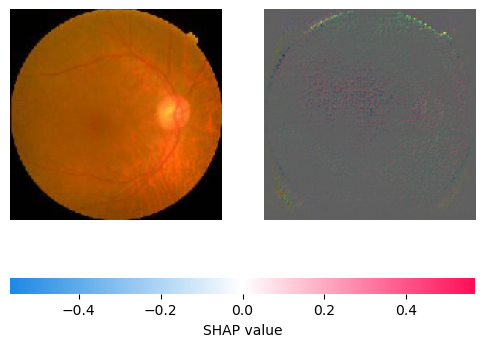

Applying Grad-CAM...


ValueError: The layer sequential has never been called and thus has no defined output.

In [65]:
# ------------------  Normalizing SHAP values ------------------

# Load background images for SHAP
background_images = np.vstack([preprocess_image(image_path) for image_path in [
    r'C:\Users\202016202.UFH-STUDENT\OneDrive - University of Fort Hare\Documents\Python Scripts\Research Project\Diagnosis of Diabetic Retinopathy\test\No_DR\0ae2dd2e09ea_png.rf.a4faf61bd46dc2930c51b3db7dba12cd.jpg', 
    r'C:\Users\202016202.UFH-STUDENT\OneDrive - University of Fort Hare\Documents\Python Scripts\Research Project\Diagnosis of Diabetic Retinopathy\test\No_DR\6bf26b777e3a_png.rf.cc0efa4c9567f6f22ac845a4f9313753.jpg'
]])

background_images = background_images.reshape((-1, 150, 150, 3))

# Create SHAP explainer
explainer = shap.DeepExplainer(loaded_model, background_images)

# Function to compute SHAP values with scaling for better visualization
def compute_shap_with_scaling(img_path):
    img_array = preprocess_image(img_path)
    shap_values = explainer.shap_values(img_array)
    
    # Normalize and visualize the SHAP values for better clarity
    shap_values = np.array(shap_values)
    shap_values = (shap_values - shap_values.min()) / (shap_values.max() - shap_values.min())  # Normalize
    
    shap.image_plot(shap_values, img_array)

# ------------------ Grad-CAM Implementation ------------------

def compute_gradcam(model, img_array, last_conv_layer_name, pred_index=None):
    
    
    grad_model = Model(
        inputs=[model.inputs], 
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )
    
    # Record operations for automatic differentiation
    with tf.GradientTape() as tape:
        
        # Forward pass
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        pred_output = predictions[:, pred_index]
    
        
        grads = tape.gradient(pred_output, conv_outputs)
    
    # Compute the guided gradients
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    
    # Multiply each channel in the feature map array by the corresponding gradient values
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    
    # Normalize the heatmap
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    
    return heatmap.numpy()

def display_gradcam(img_path, heatmap, alpha=0.4):
    # Load the original image
    img = cv2.imread(img_path)
    img = cv2.resize(img, (150, 150))
    
    # Rescale heatmap to a range of 0-255 for overlay
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    
    # Apply heatmap to original image
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * alpha + img
    
    # Display the superimposed image
    plt.imshow(superimposed_img)
    plt.axis('off')
    plt.show()

# Function to apply Grad-CAM
def apply_gradcam(img_path, model, last_conv_layer_name='conv2d_2'):
    img_array = preprocess_image(img_path)
    heatmap = compute_gradcam(model, img_array, last_conv_layer_name)
    display_gradcam(img_path, heatmap)

# ------------------ SHAP + Grad-CAM Integrated Workflow ------------------

def process_image_with_interpretability(img_path):
    
    # 1. Check model confidence
    print(f"Checking model's confidence for {img_path}:")
    check_model_confidence(img_path)

    # 2. Apply SHAP with normalized values for better visualization
    print("Applying SHAP with scaling...")
    compute_shap_with_scaling(img_path)
    
    # 3. Apply Grad-CAM to visualize important regions
    print("Applying Grad-CAM...")
    apply_gradcam(img_path, loaded_model)

# Apply all methods to an image
new_image_path = r'C:\Users\202016202.UFH-STUDENT\OneDrive - University of Fort Hare\Documents\Python Scripts\Research Project\Diagnosis of Diabetic Retinopathy\test\No_DR\0ae2dd2e09ea_png.rf.a4faf61bd46dc2930c51b3db7dba12cd.jpg'
process_image_with_interpretability(new_image_path)

In [ ]:
import ee
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Initialize Earth Engine (requires authentication)
ee.Initialize()

# Define the region of interest: Eastern Cape, South Africa
region_of_interest = ee.FeatureCollection('projects/ee-phiwokuhlemadulini747/assets/EC_Province')

# Load the ERA5-Land hourly data for 2023 and calculate wind speed
era5_land = ee.ImageCollection('ECMWF/ERA5/HOURLY') \
              .filterBounds(region_of_interest) \
              .filterDate('2023-01-01', '2023-12-31')

# Calculate wind speed from u100 and v100 components
def calc_wind_speed(image):
    u10 = image.select('u_component_of_wind_100m')
    v10 = image.select('v_component_of_wind_100m')
    wind_speed = u10.pow(2).add(v10.pow(2)).sqrt()  # Wind speed calculation
    return image.addBands(wind_speed.rename('wind_speed'))

# Apply wind speed calculation
wind_speed = era5_land.map(calc_wind_speed).select('wind_speed').mean()

# Load other relevant features
air_temp = era5_land.select('temperature_2m').mean()
pressure = era5_land.select('surface_pressure').mean()

# Load SRTM Digital Elevation Model data and calculate slope
srtm = ee.Image('USGS/SRTMGL1_003')
elevation = srtm.select('elevation').clip(region_of_interest)
slope = ee.Terrain.slope(elevation).rename('slope')

# Stack all features (wind speed, air temp, pressure, elevation, slope) into one image
features = wind_speed.addBands([air_temp, pressure, elevation, slope])

# Sample data from the region as image patches
# Adjust 'scale' and 'numPixels' as per your requirements
sample_data = features.sample(region_of_interest, scale=1000, numPixels=5000).getInfo()

# Extract the data into numpy arrays for model training
wind_speed_data = np.array([f['properties']['wind_speed'] for f in sample_data['features']])
air_temp_data = np.array([f['properties']['temperature_2m'] for f in sample_data['features']])
pressure_data = np.array([f['properties']['surface_pressure'] for f in sample_data['features']])
elevation_data = np.array([f['properties']['elevation'] for f in sample_data['features']])
slope_data = np.array([f['properties']['slope'] for f in sample_data['features']])

# Combine the features into a single dataset
X = np.stack([wind_speed_data, air_temp_data, pressure_data, elevation_data, slope_data], axis=-1)

# Binary labels: 1 for suitable (wind speed > 5), 0 for non-suitable
y = np.where(wind_speed_data > 5, 1, 0)

# Preprocessing: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X to the format (samples, height, width, channels) for CNN
X_scaled_reshaped = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1], 1)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled_reshaped, y, test_size=0.2, random_state=42)

# Define a simplified CNN model architecture
def create_simple_cnn_model(input_shape):
    model = models.Sequential()

    # First Conv2D layer
    model.add(layers.Conv2D(16, (1, 3), activation='relu', input_shape=input_shape, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((1, 2)))

    # Second Conv2D layer
    model.add(layers.Conv2D(32, (1, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())

    # Flatten and Dense layers
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))

    # Output layer for binary classification
    model.add(layers.Dense(1, activation='sigmoid'))

    # Compile the model with tuned learning rate
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Create the CNN model
input_shape = (1, X_scaled.shape[1], 1)  # Adjust based on your data's feature count
model = create_simple_cnn_model(input_shape)

# Add early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32,
                    validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model on validation data
test_loss, test_acc = model.evaluate(X_val, y_val)
print('Test accuracy:', test_acc)

# Visualize the training process
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Save the model in the native Keras format
model.save('diabetic_retinopathy_model.keras')